#  기계학습 실습 Week 5b (tabular data를 XGBoost로 classification 하기)

2024.10.10.<br>

서강대 경제대학 양현주 (hyang@sogang.ac.kr)<br><br>

This notebook uses XGBoost to classify the country of origin of olive oil.<br><br>

Tabular data source **(Search 'Olive Oil' data)**: <br>
http://www.timeseriesclassification.com/dataset.php

# 중간고사

- 새로운 데이터를 바탕으로 예측해보기 (퀴즈처럼): ex) XGBoost와 CNN 모델 돌리고, 성능 비교하는 느낌
- 일반적인 concept에 관한 질문들 많음: 설명, 코드 기반 -> 왜 이렇게 하는지  
ex) overfitting 관련 반드시 나옴. train과 validation set를 나누는 이유?  


새로운 엑셀 데이터 같은 것 찾아서 해보기


# XGBoost

- Decision Tree 기반 전통적인 분류 기계학습 모델
  - Decision Tree? node개수 n이 하이퍼 파라미터


# 1. Install and import libraries

In [1]:
import numpy as np
from matplotlib.pyplot import imshow
#from google.colab import files

# 2. Download file

In [ ]:
#!wget -O olive_oil.zip 'YOUR-DROPBOX-LINK-HERE'

In [2]:
%%capture

!unzip OliveOil.zip -d olive_oil

In [3]:
!ls olive_oil

OliveOil_TEST.arff  OliveOil_TEST.txt	 OliveOil_TRAIN.ts   OliveOil.txt
OliveOil_TEST.ts    OliveOil_TRAIN.arff  OliveOil_TRAIN.txt


# 3. Load raw files as Pandas dataframes

In [4]:
from pathlib import Path

In [5]:
train_csv = Path('olive_oil/OliveOil_TRAIN.txt')
valid_csv = Path('olive_oil/OliveOil_TEST.txt')

In [6]:
import pandas as pd

In [7]:
train_df = pd.read_csv(train_csv, delim_whitespace=True, header=None)
train_df

<ipython-input-7-2bee42ae3468>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv(train_csv, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
0,1.0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,...,-0.979553,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120
1,1.0,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,...,-0.979210,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549
2,1.0,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,...,-0.979514,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858
3,1.0,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,...,-0.968819,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614
4,1.0,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,...,-0.977420,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,-0.981331
5,2.0,-0.600229,-0.599577,-0.596144,-0.590664,-0.583358,-0.574398,-0.565483,-0.557200,-0.549211,...,-0.986319,-0.987329,-0.987618,-0.988062,-0.988807,-0.989265,-0.989560,-0.989695,-0.990430,-0.990874
6,2.0,-0.615430,-0.614164,-0.610041,-0.603962,-0.596794,-0.588885,-0.579624,-0.571410,-0.564899,...,-0.978359,-0.978609,-0.979123,-0.979192,-0.979726,-0.980732,-0.980855,-0.981049,-0.982046,-0.982640
7,2.0,-0.614015,-0.612369,-0.608472,-0.602971,-0.596025,-0.588022,-0.579095,-0.570355,-0.562975,...,-0.977127,-0.977156,-0.977082,-0.978072,-0.978743,-0.979156,-0.980033,-0.980179,-0.980446,-0.981325
8,2.0,-0.596650,-0.595023,-0.591794,-0.586665,-0.579232,-0.571202,-0.562909,-0.554685,-0.547703,...,-0.986295,-0.986149,-0.986728,-0.987620,-0.988761,-0.989280,-0.989334,-0.989841,-0.990268,-0.990883
9,2.0,-0.620747,-0.620111,-0.616434,-0.611036,-0.603726,-0.595674,-0.587556,-0.579830,-0.573194,...,-0.975419,-0.975879,-0.976500,-0.977168,-0.977320,-0.977985,-0.978558,-0.978633,-0.978808,-0.979470


In [8]:
valid_df = pd.read_csv(valid_csv, delim_whitespace=True, header=None)
valid_df

<ipython-input-8-906e27c245fd>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  valid_df = pd.read_csv(valid_csv, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
0,1.0,-0.621957,-0.620677,-0.616684,-0.611012,-0.603769,-0.595267,-0.586477,-0.577899,-0.570147,...,-0.966336,-0.967106,-0.967484,-0.967454,-0.967817,-0.968638,-0.969142,-0.969541,-0.970344,-0.970377
1,1.0,-0.618925,-0.618361,-0.614664,-0.608693,-0.601446,-0.593516,-0.585786,-0.577708,-0.569952,...,-0.971519,-0.971990,-0.972353,-0.973022,-0.973667,-0.973943,-0.974423,-0.974906,-0.975525,-0.975858
2,1.0,-0.618169,-0.616704,-0.612678,-0.607578,-0.600574,-0.592209,-0.584307,-0.576085,-0.567684,...,-0.976493,-0.976940,-0.977284,-0.977284,-0.977531,-0.978806,-0.979570,-0.979820,-0.980319,-0.980089
3,1.0,-0.613445,-0.611719,-0.607739,-0.602477,-0.595154,-0.587271,-0.579135,-0.570903,-0.563252,...,-0.976533,-0.977072,-0.977317,-0.977812,-0.978423,-0.979332,-0.979976,-0.980131,-0.980358,-0.980385
4,1.0,-0.616338,-0.615301,-0.611505,-0.605503,-0.597522,-0.589108,-0.580610,-0.572432,-0.565709,...,-0.974940,-0.975242,-0.975344,-0.975936,-0.976761,-0.977364,-0.977648,-0.978043,-0.978808,-0.978584
5,2.0,-0.618782,-0.617716,-0.613997,-0.608234,-0.601079,-0.593254,-0.585160,-0.577374,-0.569800,...,-0.974467,-0.974664,-0.974808,-0.975386,-0.975538,-0.976176,-0.977076,-0.977115,-0.977705,-0.978321
6,2.0,-0.618084,-0.615795,-0.611206,-0.605597,-0.598689,-0.591469,-0.583601,-0.574438,-0.567063,...,-0.974884,-0.975553,-0.975290,-0.975443,-0.976166,-0.977054,-0.977661,-0.977825,-0.977879,-0.978005
7,2.0,-0.611166,-0.610133,-0.606317,-0.600795,-0.593912,-0.585110,-0.576604,-0.569136,-0.562062,...,-0.981540,-0.981895,-0.982864,-0.983285,-0.983986,-0.985206,-0.985308,-0.985060,-0.985320,-0.986107
8,2.0,-0.611302,-0.610611,-0.607795,-0.601815,-0.594525,-0.586312,-0.577069,-0.568377,-0.561396,...,-0.977748,-0.978070,-0.978492,-0.979135,-0.980142,-0.981493,-0.982160,-0.981877,-0.981701,-0.982029
9,2.0,-0.622387,-0.621123,-0.617521,-0.612813,-0.606186,-0.598040,-0.590471,-0.582751,-0.574777,...,-0.977619,-0.978230,-0.978459,-0.978754,-0.979418,-0.980146,-0.980762,-0.981045,-0.981799,-0.982103


In [9]:
# concatenate train and valid set together

df = pd.concat([train_df, valid_df])
df.shape

(60, 571)

# 4. Create label arrays (ground truth data)

In [10]:
y_train = train_df[[0]].to_numpy(dtype=int).reshape(-1)
y_valid = valid_df[[0]].to_numpy(dtype=int).reshape(-1)

In [11]:
# label encoder (e.g, change ['bear', 'rabbit', 'dog'] to [0,1,2])
# CNN에서는 shore, land를 집어넣으면 알아서 수치화(labeling)를 해주었음.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_new = le.fit_transform(y_train)  # fit, transform 을 동시에
y_valid_new = le.transform(y_valid)  # validation set은 왜 fit을 안 했을까? overfitting 방지

y_train_new

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [12]:
y_train

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [13]:
# from new to old label
le.inverse_transform([0, 1, 2, 3])   # 원래 labeling하기 전에 무엇이었는지

array([1, 2, 3, 4])

# 5. Remove labels from df and scale feature values

In [14]:
# scale using standard score

from sklearn.preprocessing import StandardScaler

# load scaler
scaler = StandardScaler()  # 절대적인 수치보다 variation이 중요한데, 알고리즘이 절대적 수치에 영향을 받는 경우가 많음 -> Z-score로 바꿔줌
# 소득분포에서 일론머스크 있으면, minmax scaling 하면 우린 다 0이고 일론 머스크만 1임.....

# scale train and valid sets

# transform dataframes (take out first column which is label)
# [0]에는 정답값(class 정보)이 있기 때문에 제외하고 돌림

X_train = pd.DataFrame(scaler.fit_transform(train_df.iloc[:, 1:]), dtype='float32')  # 원칙적으로는 validation set은 보면 안 되기 때문에 train set만 fit해줌
X_valid = pd.DataFrame(scaler.transform(valid_df.iloc[:, 1:]), dtype='float32')


In [15]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,569
0,0.074444,0.008982,0.020318,-0.016441,-0.075750,-0.040916,-0.046279,-0.188316,-0.287316,-0.302234,...,-0.502074,-0.558516,-0.480037,-0.387893,-0.355388,-0.304483,-0.390263,-0.513844,-0.512308,-0.399747
1,-0.500693,-0.441718,-0.366356,-0.483508,-0.721528,-0.720837,-0.655789,-0.588441,-0.589301,-0.665499,...,-0.445824,-0.384726,-0.347853,-0.358135,-0.429220,-0.464861,-0.427511,-0.420804,-0.380978,-0.309218
2,-0.014848,0.021233,0.046802,0.084359,0.102749,0.033088,-0.002560,0.007772,-0.043098,-0.111324,...,-0.495706,-0.439093,-0.420355,-0.444105,-0.458343,-0.531228,-0.512967,-0.485126,-0.557747,-0.516959
3,-1.559304,-1.659254,-1.788237,-1.794872,-1.754128,-1.724186,-1.734690,-1.718506,-1.666124,-1.656418,...,1.255643,1.176541,1.119176,1.167714,1.184667,1.156504,1.150386,1.138350,1.085986,1.109206
4,-1.417399,-1.523114,-1.534738,-1.622112,-1.693665,-1.738378,-1.751807,-1.824182,-1.926051,-1.901045,...,-0.152745,-0.135717,-0.159628,-0.151777,-0.187440,-0.274143,-0.304239,-0.213492,-0.131465,-0.115807


# 6. Plot some data

In [16]:
import matplotlib.pyplot as plt

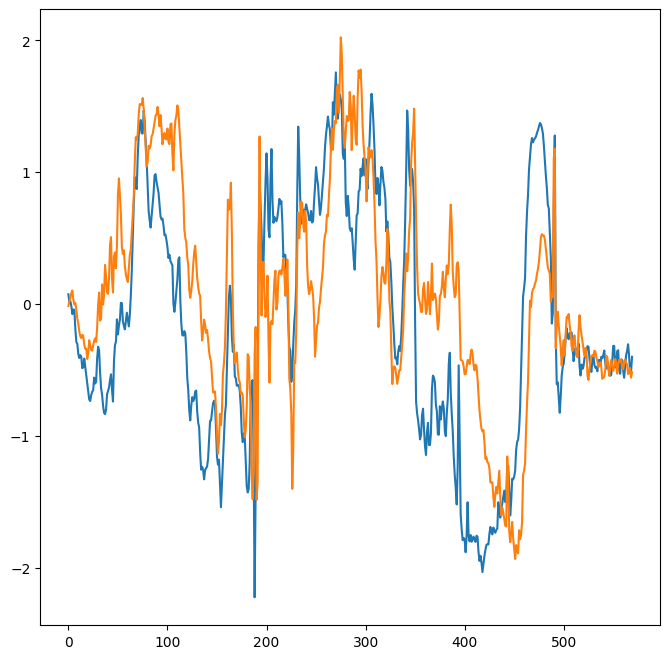

In [17]:
# plot some rows (class = 1)

plt.figure(figsize=(8, 8))
plt.plot(X_train.iloc[0])
plt.plot(X_train.iloc[2])
plt.show()

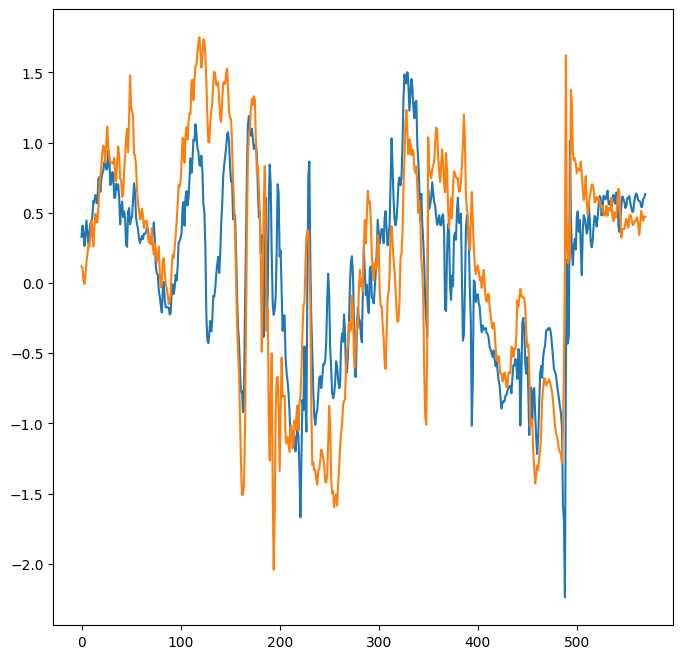

In [18]:
# plot some rows (class = 4)

plt.figure(figsize=(8, 8))
plt.plot(X_train.iloc[24])
plt.plot(X_train.iloc[28])
plt.show()

# 7. Classify using XGBoost

## 7.1 Import faiss for K-means and XGBoost library

In [19]:
import xgboost as xgb
print(xgb.__version__)

2.1.1


## 7.2. Train

In [20]:
# set XGBoost regressor parameters
my_random_seed = 128
early_stop_rounds = 20

early_stop = xgb.callback.EarlyStopping(rounds=early_stop_rounds, save_best=True)
# rounds=early_stop_rounds -> cnn의 earlystopping과 비슷함
# save_best=True -> 가장 성능이 좋았을 때 모델을 저장

xgb_classify = xgb.XGBClassifier(random_state=my_random_seed, callbacks=[early_stop])

In [21]:
%%time

## train

# fit
xgb_classify.fit(X_train, y_train_new,
                 eval_set=[(X_valid, y_valid_new)], verbose=True)

[0]	validation_0-mlogloss:1.05521
[1]	validation_0-mlogloss:0.85815
[2]	validation_0-mlogloss:0.72929
[3]	validation_0-mlogloss:0.65251
[4]	validation_0-mlogloss:0.59943
[5]	validation_0-mlogloss:0.55803
[6]	validation_0-mlogloss:0.53514
[7]	validation_0-mlogloss:0.51083
[8]	validation_0-mlogloss:0.50089
[9]	validation_0-mlogloss:0.49408
[10]	validation_0-mlogloss:0.47587
[11]	validation_0-mlogloss:0.46036
[12]	validation_0-mlogloss:0.44994
[13]	validation_0-mlogloss:0.44380
[14]	validation_0-mlogloss:0.44031
[15]	validation_0-mlogloss:0.43595
[16]	validation_0-mlogloss:0.43661
[17]	validation_0-mlogloss:0.43723
[18]	validation_0-mlogloss:0.43781
[19]	validation_0-mlogloss:0.43835
[20]	validation_0-mlogloss:0.43884
[21]	validation_0-mlogloss:0.43928
[22]	validation_0-mlogloss:0.43969
[23]	validation_0-mlogloss:0.44005
[24]	validation_0-mlogloss:0.44037
[25]	validation_0-mlogloss:0.44066
[26]	validation_0-mlogloss:0.44092
[27]	validation_0-mlogloss:0.44115
[28]	validation_0-mlogloss:0.4

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EarlyStopping object at 0x790f3e56f7f0>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## 7.3 Predict and get accuracy

In [22]:
# predict

y_predicted_vaild = xgb_classify.predict(X_valid)
y_predicted_vaild

array([2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [23]:
from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_valid_new, y_predicted_vaild)
print("Valid set accuracy: {:.2f}%".format(accuracy * 100.0))

Valid set accuracy: 83.33%


## 7.4 Evaluate performance using confusion matrix

In [24]:
# confusion matrics

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_valid_new, y_predicted_vaild)

In [25]:
# confusion matrix plot

import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    plt.figure(figsize=(12, 9))

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))
    plt.show()

In [26]:
# get class names
my_classes = le.inverse_transform(xgb_classify.classes_)
my_classes

array([1, 2, 3, 4])

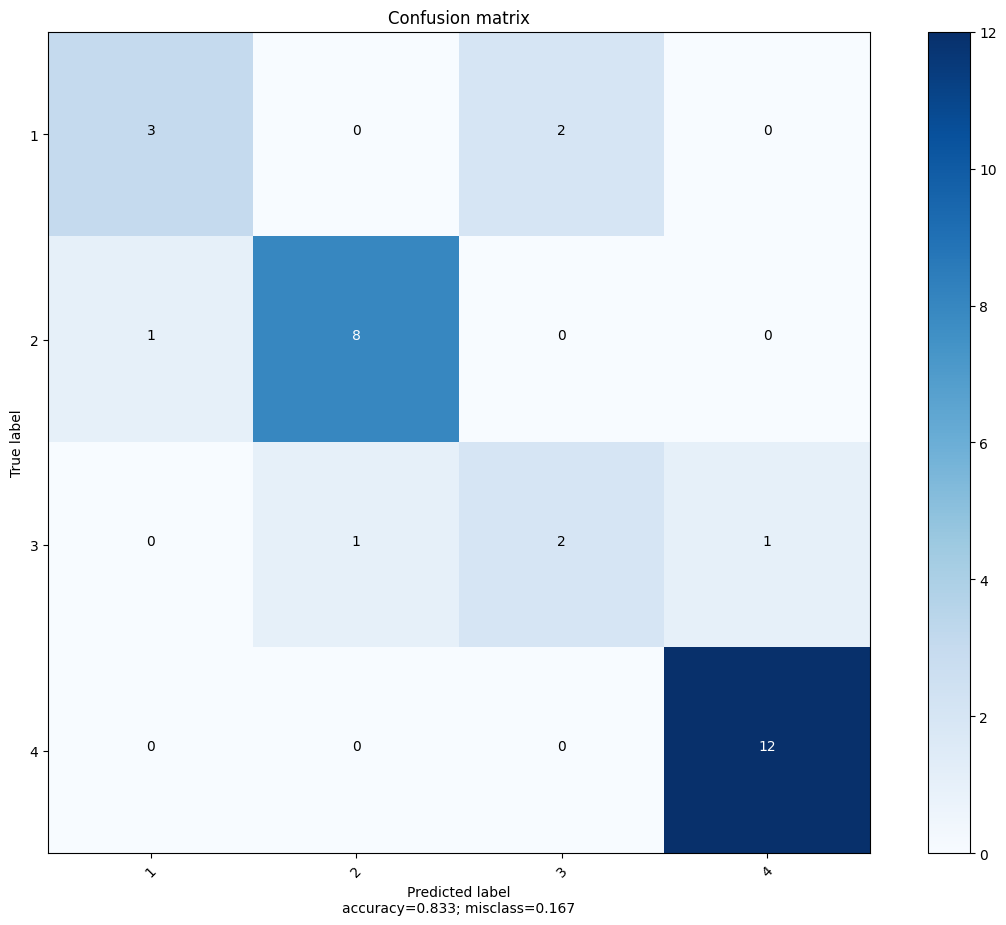

In [27]:
# plot confusion matrix (raw)

plot_confusion_matrix(conf_mx, my_classes, cmap=None, normalize=False)

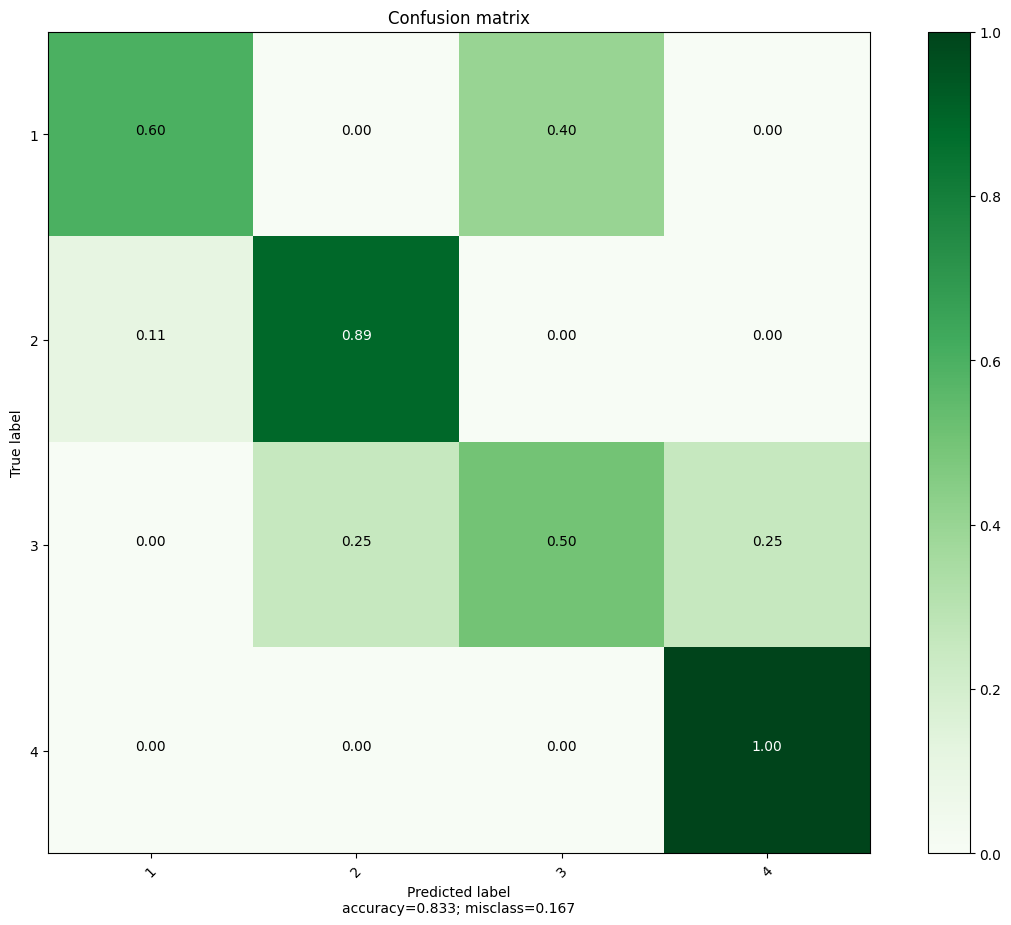

In [28]:
# plot confusion matrix (proportions)

plot_confusion_matrix(conf_mx, my_classes, cmap='Greens', normalize=True)
# 아까는 1,4번 class가 학습이 잘 됐었는데, 이번엔 2,4번 class 분류가 잘 됨.

#8. Interpretability

In [29]:
# feature importance

print(xgb_classify.feature_importances_)

[0.         0.         0.00178363 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00184366 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00079323 0.02182169 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.15280336 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.16543494 0.         0.         0.
 0.         0.         0.         0.         0.         

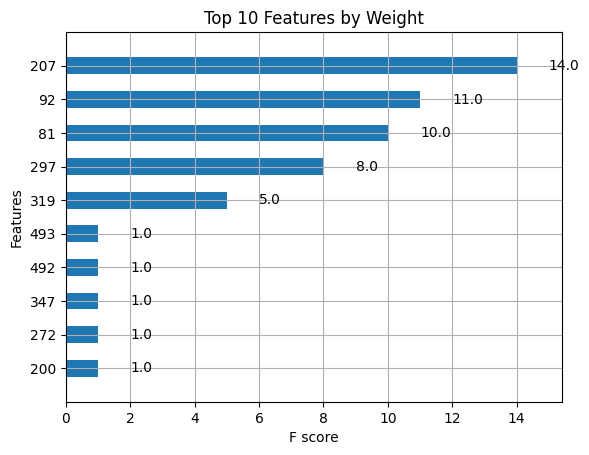

In [30]:
# plot the top 10 features by weight
# weight: The number of times a feature appears in a tree across all trees.
xgb.plot_importance(xgb_classify, importance_type='weight', max_num_features=10, height=0.5)
plt.title("Top 10 Features by Weight")
plt.show()

# decision tree에 쓰인 변수의 중요도를 다 보여줌

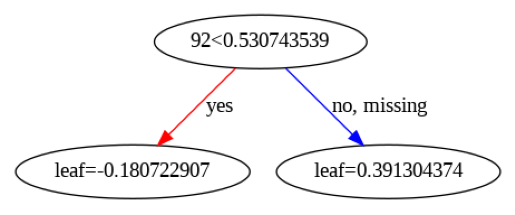

<Figure size 2000x1000 with 0 Axes>

In [31]:
# Plot a specific tree (e.g., the first tree)
xgb.plot_tree(xgb_classify, num_trees=0)
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plt.show()

<Figure size 2000x1000 with 0 Axes>

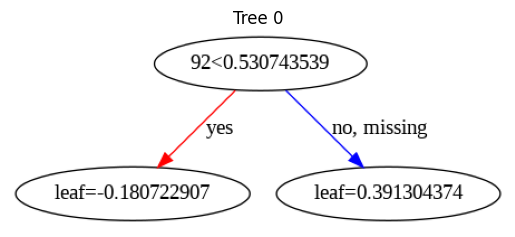

<Figure size 2000x1000 with 0 Axes>

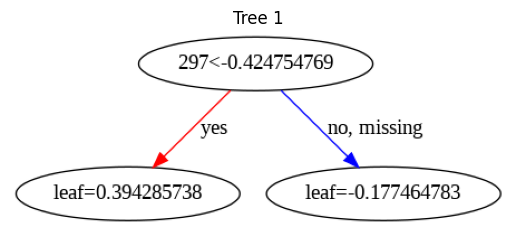

<Figure size 2000x1000 with 0 Axes>

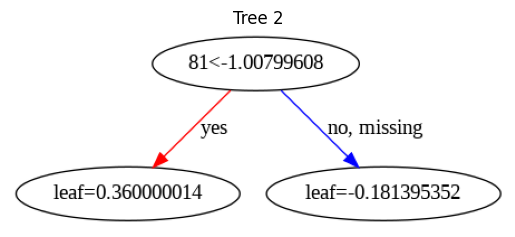

In [32]:
# Plot the first 3 trees in the model
for i in range(3):
    plt.figure(figsize=(20, 10))
    xgb.plot_tree(xgb_classify, num_trees=i)
    plt.title(f"Tree {i}")
    plt.show()

In [33]:
# Save the model
xgb_classify.save_model("xgb_model.json")

In [ ]:
"""
How to load model

xgb_model = xgb.XGBClassifier()
xgb_model.load_model("xgb_model.json")
"""